*   Analyzing the domain of sales and understanding customer behavior.
*   Performing the Exploratory Data Analysis based on the insights gained from domain knowledge.
*   Pre-Processing of the data to remove the outliers, imputing the data for missing values.
*   Scaling the data to normalize the values.
*   Considering the important features by reducing the dimensionality using PCA.
*   Using the Clustering technique to identify the segments of customers.
*   Quantum Enhancements (Comparing Algorithm on Classical vs Quantum) 

In [58]:
# Import the pandas library. More information: https://pandas.pydata.org/
import pandas as pd
import numpy as np
# Importing the marketing campaign dataset
# Import the data as a pandas dataframe
cpa = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

cpa.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
#overview of the attributes in the dataset
cpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2234 non-null   int64         
 1   Education            2234 non-null   object        
 2   Marital_Status       2234 non-null   object        
 3   Income               2234 non-null   float64       
 4   Kidhome              2234 non-null   int64         
 5   Teenhome             2234 non-null   int64         
 6   Dt_Customer          2234 non-null   datetime64[ns]
 7   Recency              2234 non-null   int64         
 8   MntWines             2234 non-null   int64         
 9   MntFruits            2234 non-null   int64         
 10  MntMeatProducts      2234 non-null   int64         
 11  MntFishProducts      2234 non-null   int64         
 12  MntSweetProducts     2234 non-null   int64         
 13  MntGoldProds         2234 non-nul

Only Income field has null values.

In [60]:
cpa['ID'].describe() #min value is zero, so all the data is positive. 

count     2240.000000
mean      5592.159821
std       3246.662198
min          0.000000
25%       2828.250000
50%       5458.500000
75%       8427.750000
max      11191.000000
Name: ID, dtype: float64

In [61]:
#replacing the income with mode.
mode = cpa['Income'].mode()[0]
cpa['Income'] = cpa['Income'].fillna(mode)
cpa['Income'].isna().sum() #checking the values

0

We will come across outliers, and we will remove them if they are less in number.

Now we are going to combine few columns into a single column

First getting into the family details :

-> Combine kidhome and teenhome to get the total number of children in the customer's household

-> Get the total headcount of the family

In [62]:
cpa['Kids'] = cpa['Kidhome'] + cpa['Teenhome']

#Deriving living situation by marital status Solo or Couple
cpa["Living_With"]=cpa["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Alone":1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1,})

#Feature for total members in the householde
cpa["Family_headcount"] = cpa["Living_With"] + cpa['Kids']

#creating a feature pertaining parenthood
cpa["Is_Parent"] = np.where(cpa.Kids> 0, 1, 0)



**Lets** get the latest and oldest dates of customer's enrollement to get the span of this dataset

In [63]:
cpa['Dt_Customer'] = pd.to_datetime(cpa['Dt_Customer'])

cpa['Dt_Customer'].max(), cpa['Dt_Customer'].min()

(Timestamp('2014-12-06 00:00:00'), Timestamp('2012-01-08 00:00:00'))

The span is nearly 2 years.

Now lets go a little back in time so that we can get the details to be readable and makes much more sense.

We will assume that the customer information was collected 2014-12-07.

In [64]:
#calculating age based on Year of Birth
cpa['Age'] = 2014 - cpa['Year_Birth']

#Year_Birth is no longer required. So, dropping the column
cpa=cpa.drop(columns="Year_Birth")

#check the values in the new column
cpa['Age'].value_counts()

# data has outliers with age>100. setting the boundary as 100 replacing all values 100 where age is greater than 100
cpa['Age']= cpa['Age'].apply(lambda x: 100 if (x > 100) else x)


45.171875

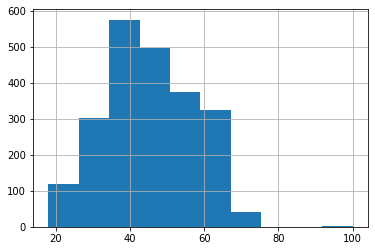

In [65]:


# Age Distribution
ax=cpa['Age'].hist()
cpa['Age'].mean()



In [66]:
cpa['Collected'] = '2014-12-07'
cpa['Collected'] = pd.to_datetime(cpa['Collected'])

cpa['Days_is_client'] = (cpa['Collected'] - cpa['Dt_Customer']).dt.days

Now going through the product and place details:

-> Get the total spending amount

-> Get the total number of purchases

-> Get Average Amount spent

-> Get the total share deals from the total number of purchases

-> Get the total number of accepted offers in all campaigns



In [67]:
cpa['MntTotal'] = cpa['MntWines']+cpa['MntFruits']+cpa['MntMeatProducts']+cpa['MntFishProducts']+cpa['MntSweetProducts']+cpa['MntGoldProds']

cpa['NumAllPurchases'] = cpa['NumWebPurchases']+cpa['NumCatalogPurchases']+cpa['NumStorePurchases']

cpa['AverageCheck'] = round((cpa['MntTotal'] / cpa['NumAllPurchases']), 1)

cpa['ShareDealsPurchases'] = round((cpa['NumDealsPurchases'] / cpa['NumAllPurchases']) * 100, 1)

cpa['TotalAcceptedCmp'] = cpa['AcceptedCmp1']+cpa['AcceptedCmp2']+cpa['AcceptedCmp3']+cpa['AcceptedCmp4']+cpa['AcceptedCmp5']+cpa['Response']

On checking the data we get to see that 6 customers have spent money but didn't make any purchase which makes no sense.

We are going to delete those six customers

Now our datacount will 2210

In [68]:
cpa = cpa.query("NumAllPurchases != 0")

{'boxes': [<matplotlib.lines.Line2D at 0x7feffa6812d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7feffa688390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feffa68f3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feffa688e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feffa6818d0>,
  <matplotlib.lines.Line2D at 0x7feffa681e10>]}

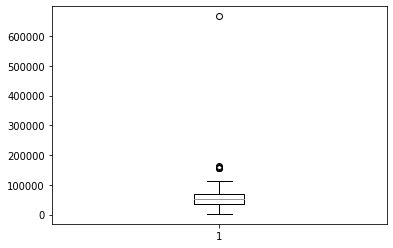

In [69]:
plt.boxplot(cpa['Income'])


{'boxes': [<matplotlib.lines.Line2D at 0x7feffa5f6150>],
 'caps': [<matplotlib.lines.Line2D at 0x7feffa5fe1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feffa606210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7feffa5fec90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7feffa5f6710>,
  <matplotlib.lines.Line2D at 0x7feffa5f6c50>]}

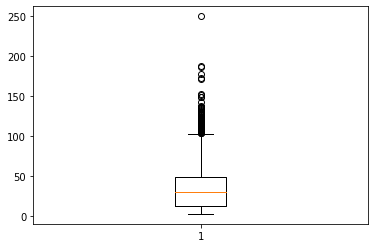

In [71]:
plt.boxplot(cpa['AverageCheck'])

Let's cover the outliers now

In [70]:
cpa['Income'] = np.where(cpa['Income'] > 120000, 120000, cpa['Income'])

cpa['AverageCheck'] = np.where(cpa['AverageCheck'] > 250, 250, cpa['AverageCheck'])

In [72]:
#Grouping education levels in to three categories
cpa["Education"]=cpa["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


<Figure size 576x576 with 0 Axes>

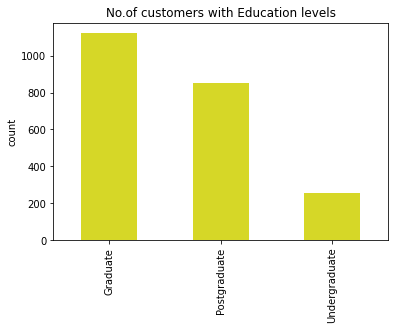

<Figure size 576x576 with 0 Axes>

In [73]:
cpa['Education'].value_counts().plot(kind='bar',color = '#d6d727')
plt.title("No.of customers with Education levels",fontsize=12)
plt.ylabel("count")
plt.figure(figsize=(8,8))

In [75]:
#Deriving living situation by marital status Solo or Couple
cpa["Living_With"]=cpa["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Alone":1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1,})

#Marital status is no longer required. So, dropping the column
cpa=cpa.drop(columns="Marital_Status")


<Figure size 576x576 with 0 Axes>

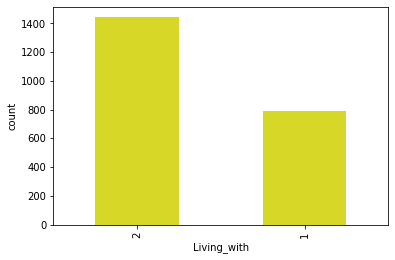

<Figure size 576x576 with 0 Axes>

In [80]:
cpa['Living_With'].value_counts().plot(kind='bar',color = '#d6d727')
plt.xlabel("Living_with")
plt.ylabel("count")
plt.figure(figsize=(8,8))

In [ ]:
cpa

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Family_headcount,Is_Parent,Age,Collected,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,5524,Graduate,58138.0,0,0,2012-04-09,58,635,88,546,...,1,0,57,2014-12-07,972,1617,22,73.5,13.6,1
1,2174,Graduate,46344.0,1,1,2014-08-03,38,11,1,6,...,3,1,60,2014-12-07,126,27,4,6.8,50.0,0
2,4141,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,...,2,0,49,2014-12-07,473,776,20,38.8,5.0,0
3,6182,Graduate,26646.0,1,0,2014-10-02,26,11,4,20,...,3,1,30,2014-12-07,66,53,6,8.8,33.3,0
4,5324,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,...,3,1,33,2014-12-07,322,422,14,30.1,35.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduate,61223.0,0,1,2013-06-13,46,709,43,182,...,3,1,47,2014-12-07,542,1341,16,83.8,12.5,0
2236,4001,Postgraduate,64014.0,2,1,2014-10-06,56,406,0,30,...,5,1,68,2014-12-07,62,444,15,29.6,46.7,1
2237,7270,Graduate,56981.0,0,0,2014-01-25,91,908,48,217,...,1,0,33,2014-12-07,316,1241,18,68.9,5.6,1
2238,8235,Postgraduate,69245.0,0,1,2014-01-24,8,428,30,214,...,3,1,58,2014-12-07,317,843,21,40.1,9.5,0


Let's cover the outliers now

In [ ]:

#Segmenting education levels in to three groups
cpa["Education"]=cpa["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For better clarity
cpa=cpa.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Collected"]

cpa = cpa.drop(to_drop, axis=1)

In [ ]:
cpa.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,Living_With,Family_headcount,Is_Parent,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,1,1,0,57,972,1617,22,73.5,13.6,1
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,1,3,1,60,126,27,4,6.8,50.0,0
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,2,2,0,49,473,776,20,38.8,5.0,0
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,2,3,1,30,66,53,6,8.8,33.3,0
4,Postgraduate,58293.0,94,173,43,118,46,27,15,5,...,2,3,1,33,322,422,14,30.1,35.7,0


We are going to preprocess the data to make the data available for PCA

Theese are the following steps will be applied to preprocess the data:

Ensure Label encoding will take place for the categorical features

Scale all the features using the standard scaler

Creating a copy of the subset dataframe for dimensionality reduction

In [ ]:
#Listing the categorical variables
cpa_categorical = (cpa.dtypes == 'object')
object_cols = list(cpa_categorical[cpa_categorical].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [ ]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    cpa[i]=cpa[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
cpa_copy = cpa.copy()
cat_col =  [x for x in cpa_copy.columns if ((cpa_copy[x].dtype != 'int64') & (cpa_copy[x].dtype != 'float64'))]
cpa_copy=pd.get_dummies(cpa_copy , columns=cat_col , drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols =  [x for x in cpa_copy.columns if ~((cpa_copy[x].dtype != 'int64') & (cpa_copy[x].dtype != 'float64'))]
Scaler = StandardScaler()
cpa_copy[num_cols] = Scaler.fit_transform(cpa_copy[num_cols])

Now we have encoded and normalized the data which is ready for dimensionality reduction.

In [ ]:
to_drop=["ShareDealsPurchases","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","NumDealsPurchases","NumWebVisitsMonth","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
cpa_copy = cpa_copy.drop(to_drop, axis=1)

In [ ]:
cpa_copy

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Complain,...,Kids,Living_With,Family_headcount,Is_Parent,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,TotalAcceptedCmp
0,-0.895637,0.315152,0.307582,0.981118,1.548633,1.676696,2.458536,1.473616,0.840633,-0.097413,...,-1.266783,-1.349336,-1.763961,-1.588603,0.985421,1.975431,1.676727,1.312465,1.188823,0.619279
1,-0.895637,-0.238887,-0.382905,-0.872661,-0.637518,-0.714752,-0.651775,-0.632720,-0.730909,-0.097413,...,1.395487,-1.349336,0.444945,0.629484,1.235669,-1.670576,-0.963936,-1.192963,-1.016467,-0.502756
2,-0.895637,0.948159,-0.797198,0.360221,0.568635,-0.178891,1.342483,-0.148505,-0.040964,-0.097413,...,-1.266783,0.741105,-0.659508,-1.588603,0.318093,-0.175110,0.279999,1.034084,0.041543,-0.502756
3,-0.895637,-1.164227,-0.797198,-0.872661,-0.562133,-0.652752,-0.505407,-0.584299,-0.750075,-0.097413,...,0.064352,0.741105,0.444945,0.629484,-1.266810,-1.929158,-0.920755,-0.914582,-0.950342,-0.502756
4,0.566975,0.322434,1.550459,-0.391391,0.417866,-0.218748,0.153247,-0.003240,-0.558423,-0.097413,...,0.064352,0.741105,0.444945,0.629484,-1.016562,-0.825875,-0.307922,0.198941,-0.246103,-0.502756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.895637,0.460074,-0.106710,1.200957,0.417866,0.064683,0.080063,2.199939,3.887892,-0.097413,...,0.064352,0.741105,0.444945,0.629484,0.151261,0.122259,1.218348,0.477322,1.529370,-0.502756
2236,0.566975,0.591185,0.238533,0.300805,-0.662646,-0.608466,-0.688367,-0.656931,-0.692579,-0.097413,...,2.726622,0.741105,2.653852,0.629484,1.902996,-1.946397,-0.271384,0.338132,-0.262635,0.619279
2237,-0.895637,0.260801,1.446886,1.792146,0.543506,0.219684,-0.102896,-0.366402,-0.385937,-0.097413,...,-1.266783,-1.349336,-1.763961,-1.588603,-1.016562,-0.851733,1.052268,0.755703,1.036734,0.619279
2238,0.566975,0.836919,-1.418636,0.366162,0.091199,0.206398,0.775309,0.069392,0.323174,-0.097413,...,0.064352,0.741105,0.444945,0.629484,1.068837,-0.847423,0.391272,1.173274,0.084525,-0.502756


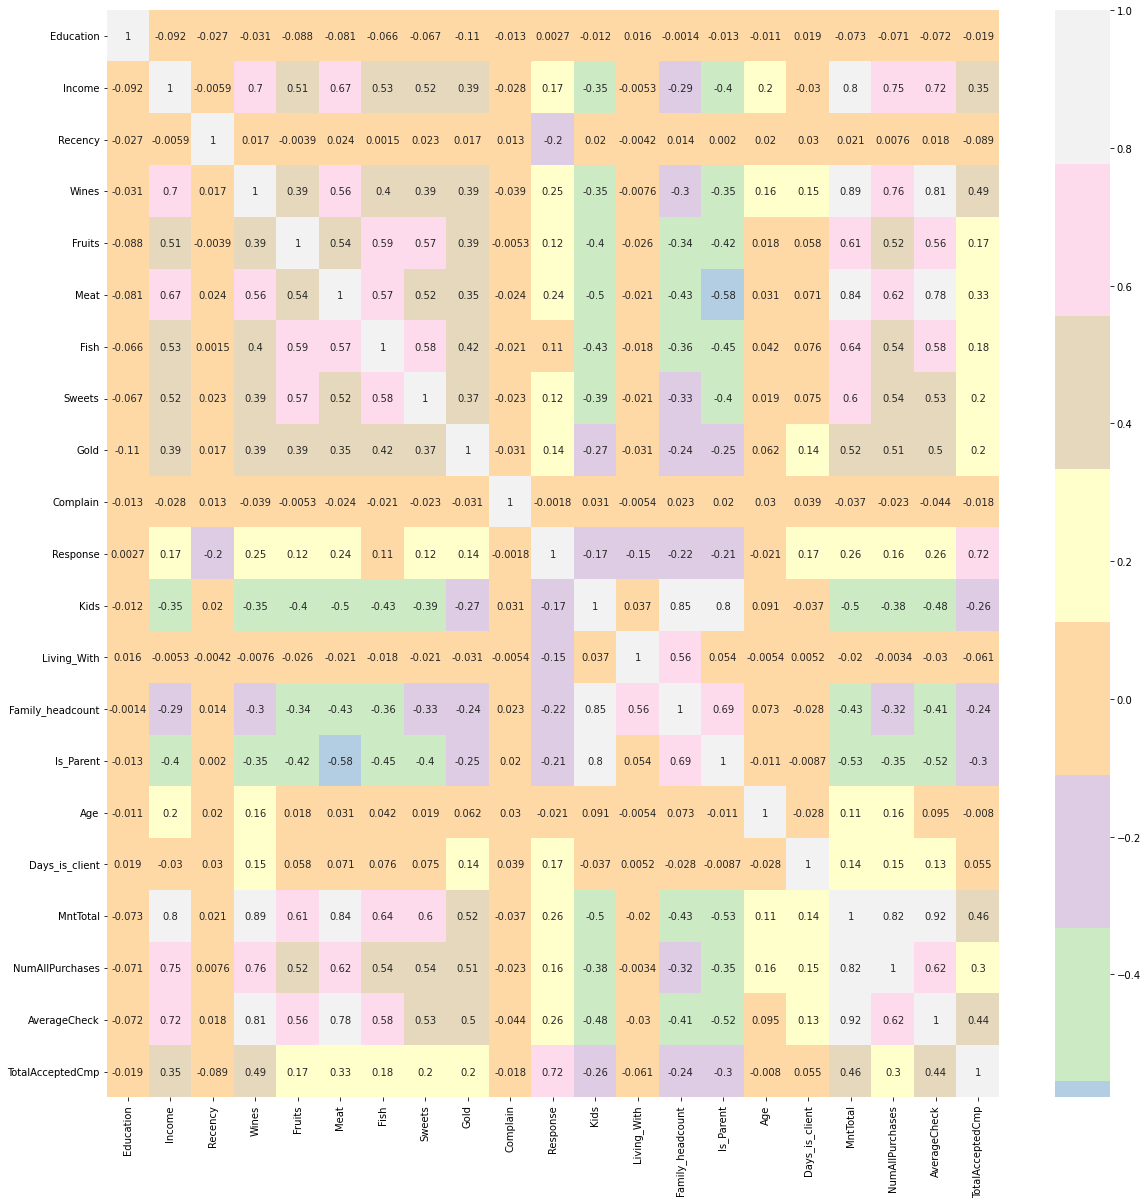

In [ ]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
correlation_matrix= cpa_copy.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(correlation_matrix,annot=True, cmap='Pastel1', center=0) #generating the matrix

In [ ]:
from matplotlib import pyplot as plot
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=9) 

#transform 
cpa_pca_transformed = pca.fit_transform(cpa_copy)

#converting to dataframe
cpa_pca= pd.DataFrame(data =  cpa_pca_transformed)

# print the component data
cpa_pca

,0,1,2,3,4,5,6,7,8
0,5.417759,1.229057,0.566618,0.972217,1.785220,-0.264575,-0.097638,0.564289,1.089636
1,-2.844883,0.026546,-0.120855,1.919754,-1.506641,-1.308937,0.255321,0.172327,-0.110385
2,1.870589,0.261845,-1.233935,-0.575328,-0.678545,-0.555644,0.631561,0.168706,1.437353
3,-2.758799,0.519393,-0.524317,-1.121640,-1.002874,-1.696684,0.340560,-0.685151,-0.374264
4,-0.699694,-0.615940,-1.109590,-0.691529,-0.091181,0.419275,-0.418805,-1.012731,-1.387117
...,...,...,...,...,...,...,...,...,...
2229,2.599844,-2.435821,-0.591035,0.062590,1.206748,-1.120289,-0.480845,0.650039,0.155186
2230,-2.030448,-3.281081,1.188619,0.794197,-2.561103,0.377934,0.291761,-0.314380,-0.756847
2231,2.626179,1.748329,-0.732709,1.131319,-0.359896,0.144767,-0.741279,-2.056230,-0.474675
2232,0.767611,-1.573685,-0.225045,-0.209939,-1.449009,-0.123914,0.583175,1.493573,0.102574


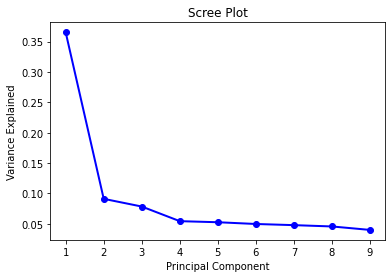

In [ ]:
pca_values = np.arange(pca.n_components_) + 1
plot.plot(pca_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plot.title('Scree Plot')
plot.xlabel('Principal Component')
plot.ylabel('Variance Explained')
plot.show()


In [ ]:

initial_feature_names = cpa_copy.columns

pca = PCA(n_components = 4)
pca.fit(cpa_copy)

n=pca.components_.shape[0]
reduced_df= pca.transform(cpa_copy)
most_important=[np.abs(pca.components_[i]).argmax() for i in range(n)]
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n)}
df = pd.DataFrame(sorted(dic.items()))
df



,0,1
0,PC1,MntTotal
1,PC2,Family_headcount
2,PC3,Response
3,PC4,Living_With


In [ ]:
pca.explained_variance_ratio_

array([0.36551089, 0.09095798, 0.07827369, 0.05416392])

In [ ]:
#converting to dataframe
cpa_pca= pd.DataFrame(data =  reduced_df, columns=(["col1","col2", "col3", "col4"]))

# print the component data
cpa_pca.head(5)

,col1,col2,col3,col4
0,5.417759,1.228952,0.566379,0.971600
1,-2.844883,0.026546,-0.120907,1.919280
2,1.870589,0.261842,-1.234078,-0.575949
3,-2.758799,0.519388,-0.524220,-1.121443
4,-0.699694,-0.615961,-1.109688,-0.691843


In [ ]:
cpa_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2234.0,3.439008e-17,2.771131,-4.124881,-2.381723,-0.831087,2.077755,8.055922
col2,2234.0,3.458886e-17,1.382379,-4.744094,-0.993925,0.011290,0.855213,4.773396
col3,2234.0,-2.385439e-17,1.282374,-3.185288,-0.724889,-0.183547,0.399128,5.095975
col4,2234.0,-3.342099e-17,1.066749,-3.123024,-0.748723,-0.097316,0.773403,5.559871


In [ ]:
cpa_copy.to_csv("/content/cpa_clean.csv", index = False, header=True)

Using the elbow to determine the number of clusters.

We can see that the elbow was not sure of 2 or 3 , but the silhouetter score determines that k = 2.

Elbow Method to determine the number of clusters to be formed:


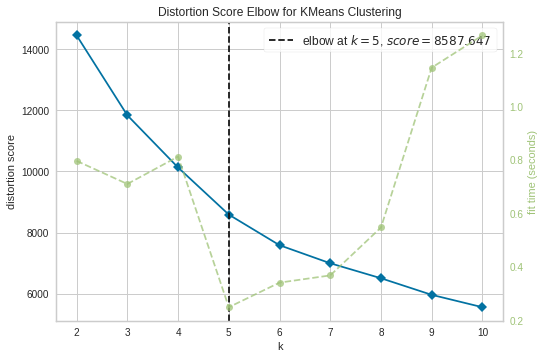

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(cpa_pca)
Elbow_M.show()

In [ ]:
kmeans = KMeans(n_clusters=5 )    
kmeans.fit(cpa_copy)
cpa['Personality']=kmeans.labels_
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


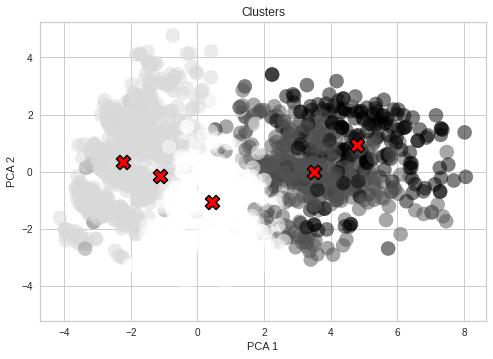

In [ ]:
x = cpa_pca.iloc[:, 0]
y = cpa_pca.iloc[:, 1]

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster
plt.title('Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(centroids_pca[:,0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

plt.show()

Text(0, 0.5, 'PC2')

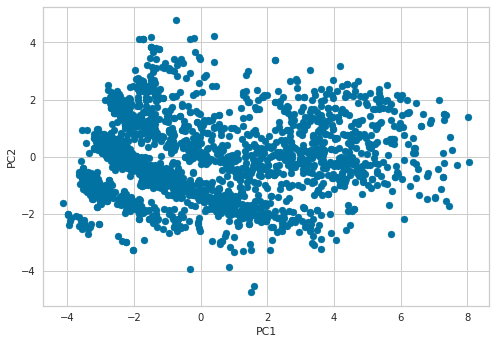

In [ ]:
plot.scatter(cpa_pca.iloc[:,0], cpa_pca.iloc[:,1])
plot.xlabel("PC1")
plot.ylabel("PC2")

**What is the percentage of each cluster ?**

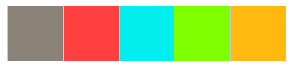

In [ ]:
colors_nude = ['#8B8378','#FF4040','#00EEEE','#7FFF00','#FFB90F']
sns.palplot(sns.color_palette(colors_nude))
# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

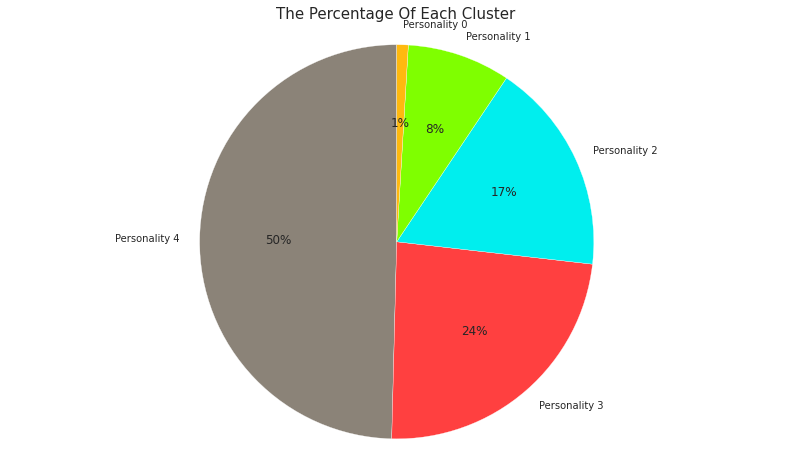

In [ ]:

plt.figure(figsize = (14,8) )
plt.pie(list(cpa['Personality'].value_counts()),labels=['Personality 4' ,'Personality 3', 'Personality 2', 'Personality 1' , 'Personality 0'],
        autopct='%.00f%%' ,colors=colors_nude, startangle=90  , explode = None)
plt.title('The Percentage Of Each Cluster ' ,fontsize = 15)
plt.axis('equal')
plt.show()

**What is the Age Distribution of each cluster ?**

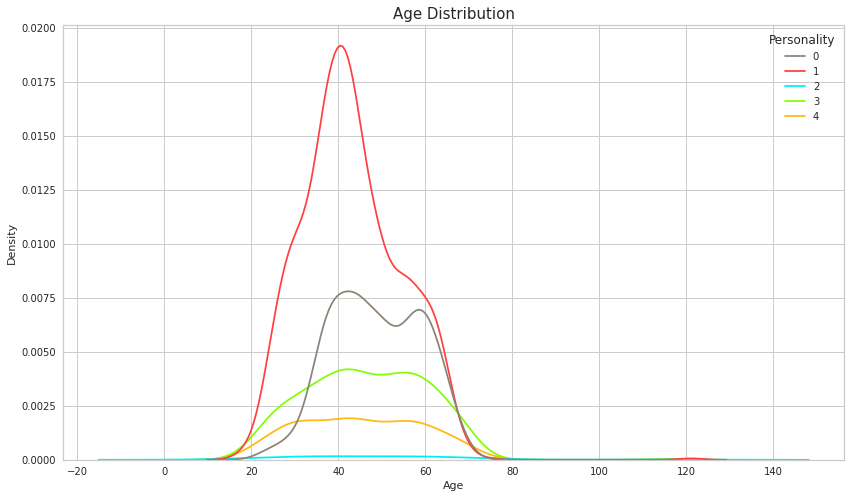

In [ ]:
plt.figure(figsize = (14,8) )
sns.kdeplot(data =cpa, x = 'Age' , hue = 'Personality' , palette=colors_nude[:5])
plt.title('Age Distribution' ,fontsize = 15)
plt.show()

In [ ]:
cluster0 = cpa[(cpa['Age'] > 40 )&(cpa['Personality'] == 0)]
cluster1 = cpa[(cpa['Age'] > 40 )&(cpa['Personality'] == 1)]
cluster2 = cpa[(cpa['Age'] > 40 )&(cpa['Personality'] == 2)]
cluster3 = cpa[(cpa['Age'] > 40 )&(cpa['Personality'] == 3)]
cluster4 = cpa[(cpa['Age'] > 40 )&(cpa['Personality'] == 4)]
print('percentage of customer more than 40 at cluster0 : {0:0.2f}%'.format(len(cluster0) / len(cpa[cpa['Personality'] == 0] )))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(cluster1) / len(cpa[cpa['Personality'] == 1])))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(cluster2) / len(cpa[cpa['Personality'] == 1])))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(cluster3) / len(cpa[cpa['Personality'] == 1])))
print('percentage of customer more than 40 at cluster1 : {0:0.2f}%'.format(len(cluster4) / len(cpa[cpa['Personality'] == 1])))

percentage of customer more than 40 at cluster0 : 0.75%
percentage of customer more than 40 at cluster1 : 0.56%
percentage of customer more than 40 at cluster1 : 0.01%
percentage of customer more than 40 at cluster1 : 0.23%
percentage of customer more than 40 at cluster1 : 0.10%


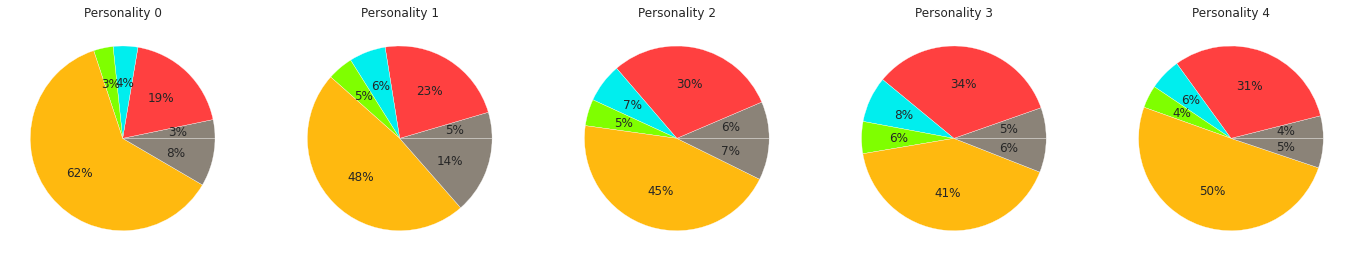

In [ ]:
plt.figure(figsize = (24,12) )
for i in range(5):
    counts =[]
    _cpa = cpa[cpa['Personality'] == i]
    counts.append(_cpa['Fruits'].sum())
    counts.append(_cpa['Meat'].sum())    
    counts.append(_cpa['Fish'].sum())    
    counts.append(_cpa['Sweets'].sum())    
    counts.append(_cpa['Wines'].sum())
    counts.append(_cpa['Gold'].sum())
    plt.subplot(1,5,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts,  autopct='%.0f%%' ,colors=colors_nude)
plt.show()

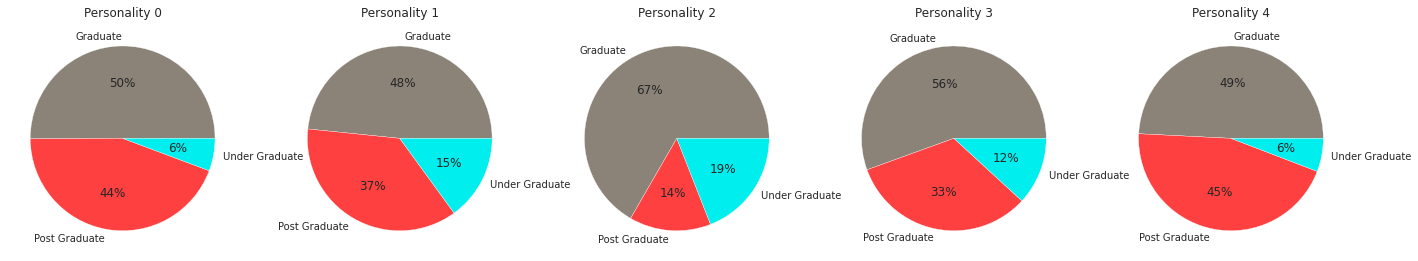

In [ ]:
plt.figure(figsize = (24,8) )
education =['Graduate', 'Post Graduate', 'Under Graduate']
for i in range(5):
    counts =[]
    _cpa_education = cpa[cpa['Personality'] == i]
    counts.append(len(_cpa_education[_cpa_education['Education'] == 0]))
    counts.append(len(_cpa_education[_cpa_education['Education'] == 1]))    
    counts.append(len(_cpa_education[_cpa_education['Education'] == 2]))    
    plt.subplot(1,5,i+1)
    plt.title("Personality "+str(i))
    plt.pie(counts, labels=education,autopct='%.0f%%' ,colors=colors_nude)
plt.show()

In [ ]:
cpa.groupby(['Personality'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personality,,,,,,,,
0,527.0,59697.364326,12252.976444,2447.0,53816.50,60631.0,66689.50,120000.0
1,1108.0,35580.410650,13339.871809,5305.0,26489.25,35661.5,44505.25,120000.0
2,21.0,45242.285714,19223.158027,15716.0,36640.00,38998.0,58113.00,83257.0
3,389.0,73164.197943,13446.057308,6560.0,67605.00,74214.0,80695.00,120000.0
4,189.0,77240.158730,13449.756722,7500.0,70643.00,79244.0,85620.00,105471.0


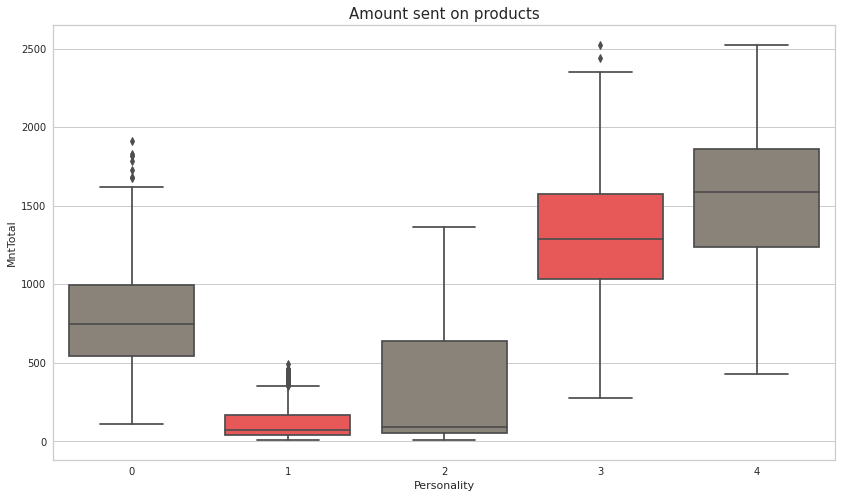

In [ ]:
plt.figure(figsize = (14,8) )
sns.boxplot(data =cpa, x = 'Personality' , y = 'MntTotal' ,palette=colors_nude[:2])
plt.title('Amount sent on products' ,fontsize = 15)
plt.show()

In [ ]:
cpa_quantum = pd.read_csv("/content/cpa_clean.csv")
cpa_quantum

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Complain,...,Kids,Living_With,Family_headcount,Is_Parent,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,TotalAcceptedCmp
0,-0.895637,0.315152,0.307582,0.981118,1.548633,1.676696,2.458536,1.473616,0.840633,-0.097413,...,-1.266783,-1.349336,-1.763961,-1.588603,0.985421,1.975431,1.676727,1.312465,1.188823,0.619279
1,-0.895637,-0.238887,-0.382905,-0.872661,-0.637518,-0.714752,-0.651775,-0.632720,-0.730909,-0.097413,...,1.395487,-1.349336,0.444945,0.629484,1.235669,-1.670576,-0.963936,-1.192963,-1.016467,-0.502756
2,-0.895637,0.948159,-0.797198,0.360221,0.568635,-0.178891,1.342483,-0.148505,-0.040964,-0.097413,...,-1.266783,0.741105,-0.659508,-1.588603,0.318093,-0.175110,0.279999,1.034084,0.041543,-0.502756
3,-0.895637,-1.164227,-0.797198,-0.872661,-0.562133,-0.652752,-0.505407,-0.584299,-0.750075,-0.097413,...,0.064352,0.741105,0.444945,0.629484,-1.266810,-1.929158,-0.920755,-0.914582,-0.950342,-0.502756
4,0.566975,0.322434,1.550459,-0.391391,0.417866,-0.218748,0.153247,-0.003240,-0.558423,-0.097413,...,0.064352,0.741105,0.444945,0.629484,-1.016562,-0.825875,-0.307922,0.198941,-0.246103,-0.502756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,-0.895637,0.460074,-0.106710,1.200957,0.417866,0.064683,0.080063,2.199939,3.887892,-0.097413,...,0.064352,0.741105,0.444945,0.629484,0.151261,0.122259,1.218348,0.477322,1.529370,-0.502756
2230,0.566975,0.591185,0.238533,0.300805,-0.662646,-0.608466,-0.688367,-0.656931,-0.692579,-0.097413,...,2.726622,0.741105,2.653852,0.629484,1.902996,-1.946397,-0.271384,0.338132,-0.262635,0.619279
2231,-0.895637,0.260801,1.446886,1.792146,0.543506,0.219684,-0.102896,-0.366402,-0.385937,-0.097413,...,-1.266783,-1.349336,-1.763961,-1.588603,-1.016562,-0.851733,1.052268,0.755703,1.036734,0.619279
2232,0.566975,0.836919,-1.418636,0.366162,0.091199,0.206398,0.775309,0.069392,0.323174,-0.097413,...,0.064352,0.741105,0.444945,0.629484,1.068837,-0.847423,0.391272,1.173274,0.084525,-0.502756


In [ ]:
k=3

n= cpa_quantum.shape[0]
n
c=cpa_quantum.shape[1]
c

21

In [ ]:
import numpy as np

 
centroid_min = cpa_quantum.min().min()
centroid_max = cpa_quantum.max().max()
centroids = []

for centroid in range(k):
   centroid = np.random.uniform(centroid_min, centroid_max, c)
  
   centroids.append(centroid.tolist())
 

centroids = pd.DataFrame(centroids, columns = cpa_quantum.columns)

centroids



,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Complain,...,Kids,Living_With,Family_headcount,Is_Parent,Age,Days_is_client,MntTotal,NumAllPurchases,AverageCheck,TotalAcceptedCmp
0,1.879688,-0.808825,9.114619,5.862695,3.839458,3.055154,8.292530,-0.317208,6.996216,1.456081,...,3.369794,9.071583,0.611913,6.148408,7.637310,-1.788047,0.007637,1.794100,8.185430,-1.604722
1,3.878637,7.590859,10.049993,1.283109,7.816837,7.374049,4.603139,-2.167055,1.983543,5.401290,...,8.720098,8.351570,-2.154906,-1.673711,10.052182,0.491184,8.987257,9.117178,1.907700,6.751120
2,-1.797752,1.919872,4.647992,0.220964,0.411668,7.547022,7.384354,3.251641,3.693571,7.242630,...,4.431378,3.142976,7.271396,4.411453,6.360113,-1.937459,4.768312,3.195925,3.295862,0.427269


In [ ]:
#install the qiskit
!pip install qiskit
# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

In [ ]:
simulator=Aer.get_backend('qasm_simulator')

In [ ]:
qregister=QuantumRegister(5,'qregister')

# this holds the resultant measurements
cregister=ClassicalRegister(1,'cregister')


qc=QuantumCircuit(qregister,cregister,name='qc')

result_list=[]



In [ ]:

def centroid_distances(point, centroids):
  for i in range(1,4):
    qc.h(qregister[4])

    #encoding the centroid and new points
   
    phi_list= [ {((x + 1) * pi / 2) for x in [point[0], centroids[0][0],centroids[1][0], centroids[2][0]]}]
    theta_list= [ {((x + 1) * pi / 2) for x in [point[1], centroids[0][1],centroids[1][1], centroids[2][1]]}]

    

    
    qc.h(qregister[2])

    qc.u3(theta4[0],theta3[0],theta2[0],theta1[0], 0,qregister[0])
    qc.u3(theta4[i],theta3[i],theta2[i],theta1[i],0,qregister[i])

    qc.cswap(qregister[3],qregister[4],qregister[2], qregister[0],qregister[1])


    qc.measure(qregister[2],cregister[0])

    qc.reset(qregister)

    execute_job=execute(qc, backend=simulator, shots=5000)
    result= execute_job.result().get_counts(qc)

    try:
      result_list.append(result['1'])
    except:
      result_list.append(0)












In [ ]:
!pip install qcware

     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 36.6 MB/s 
     |████████████████████████████████| 188 kB 56.4 MB/s 
     |████████████████████████████████| 1.1 MB 41.5 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 11.1 MB 37.4 MB/s 
     |████████████████████████████████| 231 kB 49.5 MB/s 
     |████████████████████████████████| 144 kB 41.4 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 271 kB 55.2 MB/s 
     |████████████████████████████████| 51 kB 7.3 MB/s 
  Created wheel for icontract: filename=icontract-2.6.1-py3-none-any.whl size=41341 sha256=020638226d62c0755e1cf1b9b102f8dacc8a57fb7058dfc18c5aacdce1cb8e52
  Stored in directory: /root/.cache/pip/wheels/b5/85/62/de3d48d64e2f10a69af1a3c54b859b00e79d82ba0ca87556df
Successfully built icontract
  Attempting uninstal

In [ ]:
from qcware.forge.qml import QMeans
from qcware import forge
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# this line is for internal tracking; it is not necessary for use!
# forge.config.set_environment_source_file('clustering.ipynb')

# Paste your API key below if not using Forge hosted notebooks
forge.config.set_api_key('F7g5kY9IgYulXkdz')

In [ ]:
few=cpa_copy[['Income','Age']]
few.head(100)

,Income,Age
0,0.315152,0.985421
1,-0.238887,1.235669
2,0.948159,0.318093
3,-1.164227,-1.266810
4,0.322434,-1.016562
...,...,...
95,-1.002159,-1.183394
96,-0.165040,0.735173
97,0.018027,-0.265818
98,1.271544,1.485916


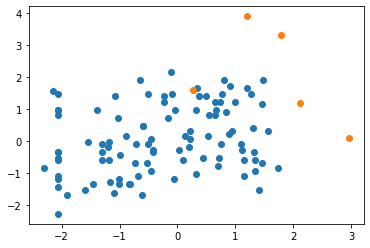

In [ ]:
N_CLUSTERS, CLUSTER_SPREAD, DIMENSION = 5, 4, 2

cluster_centers = np.random.random((N_CLUSTERS, DIMENSION)) * CLUSTER_SPREAD
points =  few.head(100).to_numpy()
points
plt.scatter(points[:,0], points[:,1])

plt.scatter(cluster_centers[:,0], cluster_centers[:,1])

In [ ]:
arr = cpa.head().to_numpy()
arr

array([[0.0000e+00, 5.8138e+04, 5.8000e+01, 6.3500e+02, 8.8000e+01,
        5.4600e+02, 1.7200e+02, 8.8000e+01, 8.8000e+01, 3.0000e+00,
        8.0000e+00, 1.0000e+01, 4.0000e+00, 7.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        5.7000e+01, 9.7200e+02, 1.6170e+03, 2.2000e+01, 7.3500e+01,
        1.3600e+01, 1.0000e+00],
       [0.0000e+00, 4.6344e+04, 3.8000e+01, 1.1000e+01, 1.0000e+00,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 6.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        6.0000e+01, 1.2600e+02, 2.7000e+01, 4.0000e+00, 6.8000e+00,
        5.0000e+01, 0.0000e+00],
       [0.0000e+00, 7.1613e+04, 2.6000e+01, 4.2600e+02, 4.9000e+01,
        1.2700e+02, 1.1100e+02, 2.1000e+01, 4.2000

array([3, 3, 2, 4, 0, 0, 0, 4, 0, 1, 4, 4, 3, 3, 4, 3, 0, 3, 3, 4, 0, 4,
       3, 3, 3, 1, 0, 4, 4, 2, 4, 1, 0, 3, 3, 3, 2, 4, 0, 3, 2, 4, 1, 1,
       4, 2, 4, 0, 1, 3, 3, 2, 0, 2, 2, 3, 2, 4, 4, 0, 2, 2, 3, 3, 3, 1,
       1, 2, 3, 2, 3, 4, 3, 0, 1, 0, 2, 2, 4, 0, 4, 1, 4, 1, 2, 1, 0, 3,
       2, 0, 1, 1, 4, 0, 1, 4, 3, 0, 3, 0])

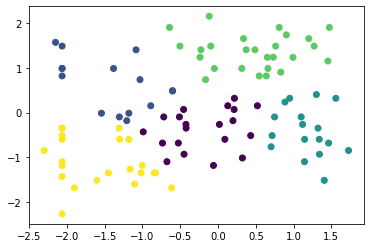

In [ ]:
qmeans = QMeans(n_clusters=N_CLUSTERS)
qmeans.fit(points)
qlabels = qmeans.predict(points)

plt.scatter(points[:,0], points[:,1], c=qlabels)
qlabels

In [ ]:
clusterCount = np.bincount(qlabels)
clusterCount

array([20, 15, 17, 26, 22])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     0
1     0
2     4
3     3
4     4
     ..
95    3
96    0
97    1
98    0
99    1
Name: Personality, Length: 100, dtype: int32

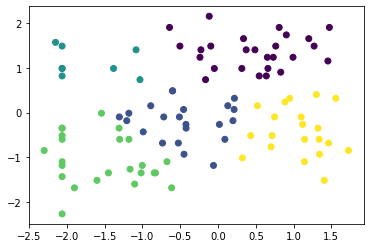

In [ ]:
from sklearn.cluster import  KMeans
clusters = KMeans(n_clusters=5).fit(points)
new =few.head(100)
new["Personality"]= clusters.labels_
plt.scatter(points[:,0], points[:,1], c=new["Personality"])
new["Personality"]

In [ ]:
clusterCount = np.bincount(new["Personality"])
clusterCount

array([26, 22,  8, 24, 20])